<a href="https://colab.research.google.com/github/Yashwati-patel/Face_Emotion_Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

##For Models ##
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Getting the Data-Set from kaggle
!wget https://www.kaggle.com/msambare/fer2013

--2022-04-21 19:04:04--  https://www.kaggle.com/msambare/fer2013
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fer2013’

fer2013                 [ <=>                ]  14.26K  --.-KB/s    in 0s      

2022-04-21 19:04:04 (70.3 MB/s) - ‘fer2013’ saved [14599]



In [4]:
# Unzipping the dataset
!unzip  -q "/content/drive/MyDrive/CAPSTONE PROJECT-1/archive.zip"

In [5]:
#creating path from dataset
train_path=Path("/content/train")
dataset =[str(list(train_path.glob("*"))[i]).split('/')[-1] for i in range(len(list(train_path.glob("*"))))]
dataset

['surprise', 'disgust', 'neutral', 'sad', 'happy', 'fear', 'angry']

In [6]:
dataset=['surprise', 'disgust', 'neutral', 'sad', 'happy', 'fear', 'angry']

In [10]:
# Reading  image from dataset
img_happy=cv2.imread('/content/train/happy/Training_11149790.jpg')

In [11]:
# find dimension of the image
img_happy.shape

(48, 48, 3)

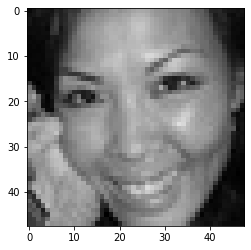

In [12]:
# displaying the image
plt.imshow(img_happy)

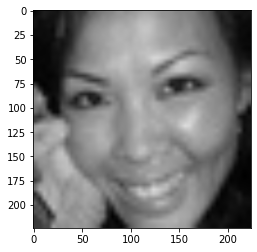

In [13]:
# resizing the image 
img_size=224
new_array=cv2.resize(img_happy,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# convert the path to string type
path_list=list(map(lambda x: str(x), list(train_path.glob("*/*"))))

In [16]:
# loading the training data
training_data=[]
for path in path_list:
  img_array=cv2.imread(path)
  new_array=cv2.resize(img_array,(img_size,img_size))
  Class_label=dataset.index(path.split('/')[-2])
  training_data.append([new_array,Class_label])

In [17]:
# data suffling
import random
random.shuffle(training_data)
training_data=training_data[:2500]